In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from flask import Flask,request, jsonify

In [10]:
data=pd.read_csv("C:/Users/ashish k amin/Desktop/dataScience/projects/Bank Dataset and model/bank-full.csv",sep=';')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
data.loc[data['job']=='blue-collar','job']='bluecollar'

In [16]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,bluecollar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


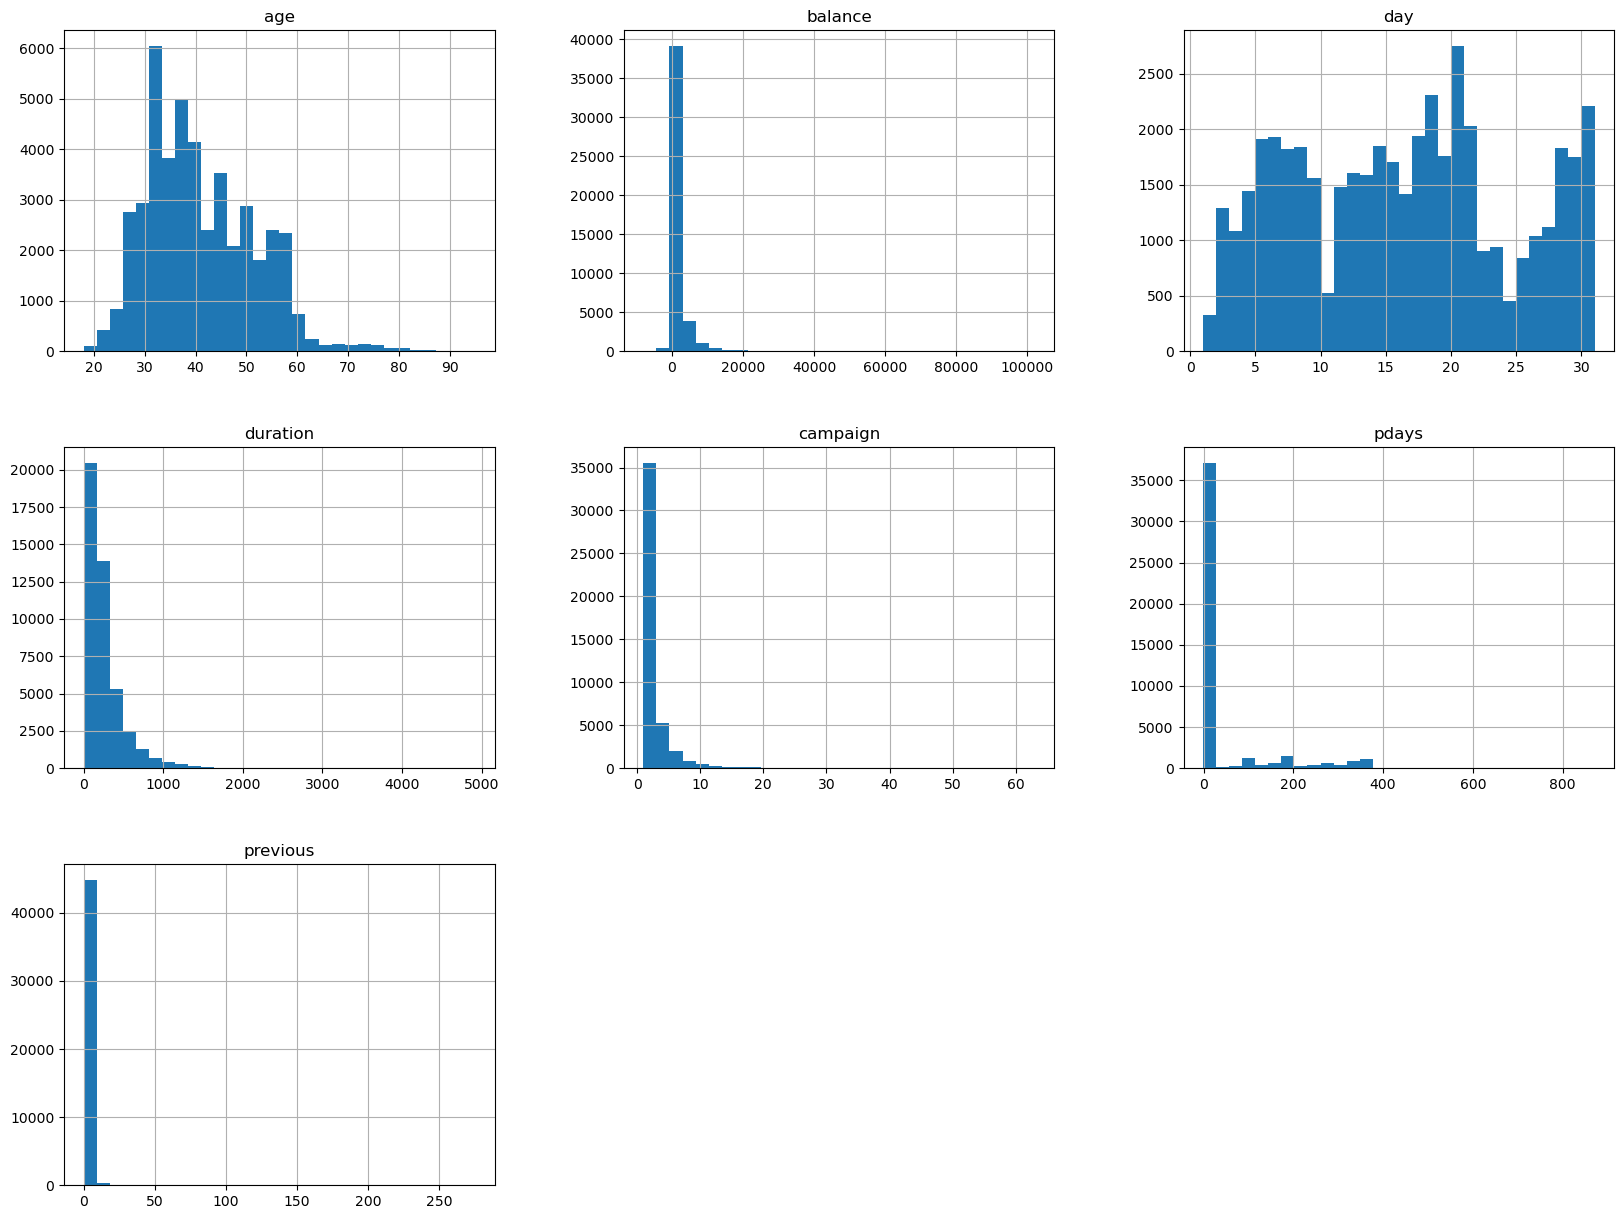

In [18]:
data.hist(bins=30, figsize=(20,15))
plt.show()

In [19]:
data['contact_duration_rate']=data['duration'] /(data['campaign']+1)

In [20]:
data_encoded =pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

In [21]:
 X=data_encoded.drop('y',axis=1)

In [22]:
 y=data_encoded['y']

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Initialize models
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

In [26]:
#training models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)

In [34]:
#converting strings to bits
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test) 
log_reg_pred_encoded = label_encoder.transform(log_reg_pred)

In [29]:
print("Logistic Regression Metrics\n")
print(f"Accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(f"Precision: {precision_score(y_test_encoded, log_reg_pred_encoded)}")
print(f"Recall: {recall_score(y_test_encoded, log_reg_pred_encoded)}")
print(f"F1 Score: {f1_score(y_test_encoded, log_reg_pred_encoded)}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, log_reg_pred_encoded)}")


Logistic Regression Metrics

Accuracy: 0.8983744332632976
Precision: 0.6482758620689655
Recall: 0.3446379468377635
F1 Score: 0.4500299222022741
ROC AUC: 0.659492011648258


In [30]:
rf_clf_pred_encoded = label_encoder.transform(rf_clf_pred)

In [31]:
print("Random Forest Classifier Metrics\n")
print(f"Accuracy: {accuracy_score(y_test_encoded, rf_clf_pred_encoded)}")
print(f"Precision: {precision_score(y_test_encoded, rf_clf_pred_encoded)}")
print(f"Recall: {recall_score(y_test_encoded, rf_clf_pred_encoded)}")
print(f"F1 Score: {f1_score(y_test_encoded, rf_clf_pred_encoded)}")
print(f"ROC AUC: {roc_auc_score(y_test_encoded, rf_clf_pred_encoded)}")

Random Forest Classifier Metrics

Accuracy: 0.9032400751962845
Precision: 0.65
Recall: 0.42896425297891844
F1 Score: 0.5168415240198785
ROC AUC: 0.698637056066924


In [32]:
# Feature importance for Random Forest
importances = rf_clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

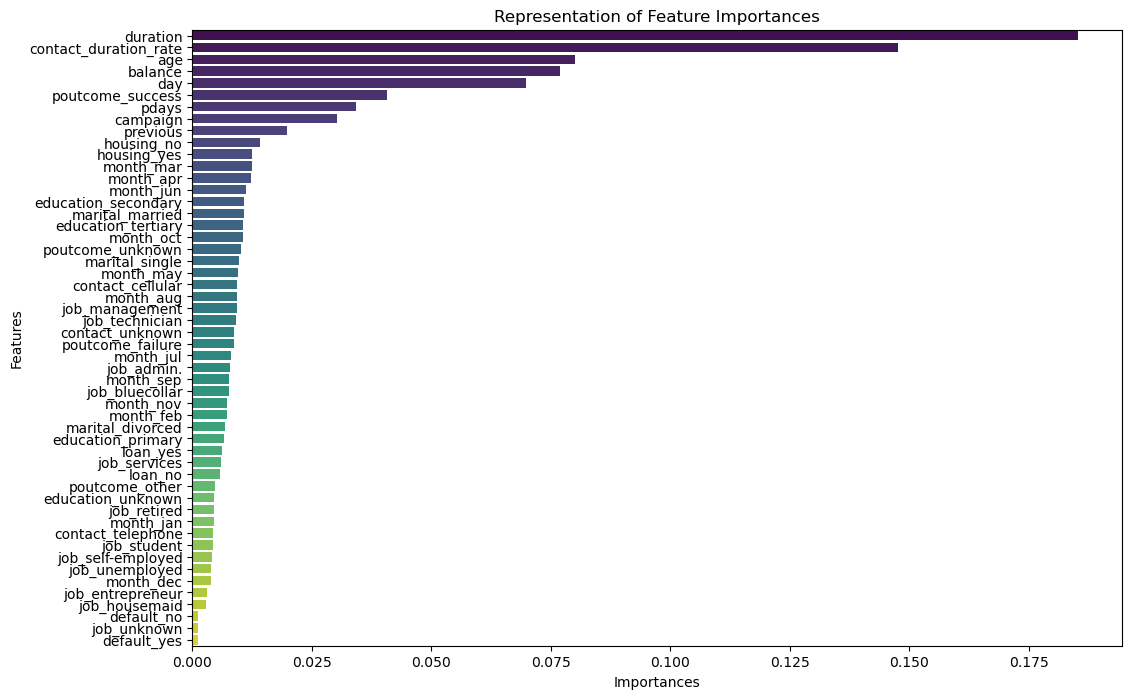

In [33]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=features[indices],hue=features[indices],palette='viridis')
plt.title('Representation of Feature Importances')
plt.ylabel('Features')
plt.xlabel('Importances')
plt.show()